In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
from datetime import datetime, timedelta

sns.set_style({'font.sans-serif':'Laksaman'})
#sns.set_style('whitegrid', {'font.sans-serif':'Laksaman'})

In [2]:
df = pd.read_csv("./datasets_clean/Gantt_withcolors.csv")
df.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,...,Start,Connection,Operation,Shutdown,Construction_time,Online,current_num,ctime_y,ctime_start,color_type
0,CHINA,CN -53,TIANWAN-5,PWR,CNP-1000,2905,1118,1000,JNPC,SHE,...,2015-12-01,2020-08-01,2020-09-01 00:00:00,NaN,1705,True,271,4.671233,65.958904,#377eb8
1,CHINA,CN -51,FUQING-5,PWR,HPR1000,3060,1150,1000,FQNP,NPIC,...,2015-05-01,2020-11-01,2021-01-01 00:00:00,NaN,2011,True,270,5.509589,65.372603,#377eb8
2,CHINA,CN -48,YANGJIANG-6,PWR,ACPR-1000,2905,1086,1000,YJNPC,CFHI,...,2013-12-01,2019-06-01,2019-07-01 00:00:00,NaN,2008,True,268,5.501370,63.958904,#377eb8
3,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,...,2013-11-01,2020-11-01,NaN,NaN,2557,True,196,7.005479,63.876712,#377eb8
4,CHINA,CN -46,TIANWAN-4,PWR,VVER V-428M,3000,1126,1045,JNPC,IZ,...,2013-09-01,2018-10-01,2018-12-01 00:00:00,NaN,1856,True,266,5.084932,63.709589,#377eb8


In [3]:
df['operation_y'] = pd.to_datetime(df['Operation']).dt.year
df['shutdown_y'] = pd.to_datetime(df['Shutdown']).dt.year

In [4]:
#### Dict for type
t_dict = {'PWR  ':'PWR',
          'BWR  ':'BWR',
          'GCR  ':'GCR',
          'PHWR ':'PHWR',
          'FBR  ':'FBR',
          'LWGR ':'LWGR',
          'HWLWR':'HWLWR',
          'HTGR ':'OTHER',
          'HWGCR':'OTHER',
          'SGHWR':'OTHER',
          'X    ':'OTHER'}

df['type_n'] = df['Type']
df.replace({"type_n": t_dict}, inplace=True)

In [5]:
df.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,...,Shutdown,Construction_time,Online,current_num,ctime_y,ctime_start,color_type,operation_y,shutdown_y,type_n
0,CHINA,CN -53,TIANWAN-5,PWR,CNP-1000,2905,1118,1000,JNPC,SHE,...,NaN,1705,True,271,4.671233,65.958904,#377eb8,2020.0,NaN,PWR
1,CHINA,CN -51,FUQING-5,PWR,HPR1000,3060,1150,1000,FQNP,NPIC,...,NaN,2011,True,270,5.509589,65.372603,#377eb8,2021.0,NaN,PWR
2,CHINA,CN -48,YANGJIANG-6,PWR,ACPR-1000,2905,1086,1000,YJNPC,CFHI,...,NaN,2008,True,268,5.501370,63.958904,#377eb8,2019.0,NaN,PWR
3,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,...,NaN,2557,True,196,7.005479,63.876712,#377eb8,NaN,NaN,PWR
4,CHINA,CN -46,TIANWAN-4,PWR,VVER V-428M,3000,1126,1045,JNPC,IZ,...,NaN,1856,True,266,5.084932,63.709589,#377eb8,2018.0,NaN,PWR


In [6]:
year_arr = np.arange(1950, 2021)
year_arr

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [7]:
additions = []
subtractions = []

for year in year_arr:
    additions.append(df.loc[df['operation_y'] == year, 'Net'].sum())
    subtractions.append(-1*df.loc[df['shutdown_y'] == year, 'Net'].sum())

/tmp/ipykernel_48783/3155553443.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(test_list, color='w')
/tmp/ipykernel_48783/3155553443.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(test_list, color='w')


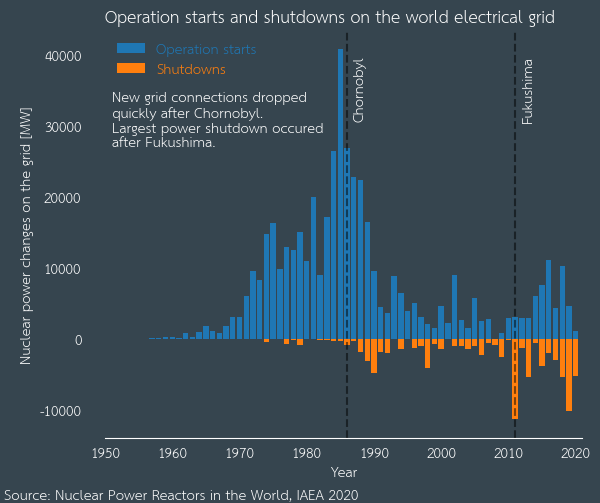

In [8]:
facecolor = '#36454F'

fig, ax = plt.subplots(figsize=(6,5), facecolor=facecolor)

ax.set_facecolor(facecolor)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')


plt.bar(year_arr, additions)
plt.bar(year_arr, subtractions)
plt.xlim(1950,2021)
plt.xlabel("Year", c='w')
plt.ylabel("Nuclear power changes on the grid [MW]", c='w')
plt.title("Operation starts and shutdowns on the world electrical grid", color='w', loc='left')
plt.legend(["Operation starts", "Shutdowns"], frameon=False, labelcolor='linecolor')

ax.axvline(1986, linestyle="--", color='k', alpha=0.5)
ax.text(1987, 40000,'Chornobyl',rotation=90, color='w', va='top')
ax.axvline(2011, linestyle="--", color='k', alpha=0.5)
ax.text(2012, 40000,'Fukushima',rotation=90, color='w', va='top')

locs, labels = plt.xticks()
test_list = [int(i) for i in locs]
ax.set_xticklabels(test_list, color='w')

locs, labels = plt.yticks()
test_list = [int(i) for i in locs]
ax.set_yticklabels(test_list, color='w')

plt.tick_params(bottom = False)
plt.tick_params(left = False)

ax.text(1951, 35000, "New grid connections dropped\nquickly after Chornobyl.\nLargest power shutdown occured\nafter Fukushima.", ha="left", va='top', c='w')

plt.tight_layout()
ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points', color='w')
plt.savefig("Operations_Shutdowns.png", dpi=300)
plt.show()